In [1]:
import pooch


url = f"https://github.com/juoceano/geoquimica_marinha/releases/download/"
version = "v0.0.1.dev"

fname = pooch.retrieve(
    url=f"{url}/{version}/Pratica_Campo_Geoquimica_20221.xlsx",
    known_hash="sha256:fd0c72203a143c12f91a0524bd54e884b6b075aae4e06cf9d4c50343310c13f6",
)

In [2]:
import pandas as pd


df1 = pd.read_excel(fname, index_col="Amostra", sheet_name=1)
df1

,Cadinho,Peso Cadinho (g),Peso Amostra (g),Peso Cadinho após mufla (g),Materia Organica
Amostra,,,,,
IGT01,4,36.063,2.038,36.582,0.745339
IGT02,14-5A,35.003,2.027,35.560,0.725210
IGT03,19,26.662,2.042,27.694,0.494613
IGT04,9-8B,37.319,2.018,37.823,0.750248
IGT05,7B,36.612,2.000,37.457,0.577500
SDD01,22-2B,36.283,2.013,37.951,0.171386
SDD01.1,6,26.721,2.063,28.516,0.129908
SDD(PTO)03,21,24.640,2.039,26.337,0.167729
SDD04,18-4B,35.605,2.051,37.484,0.083862


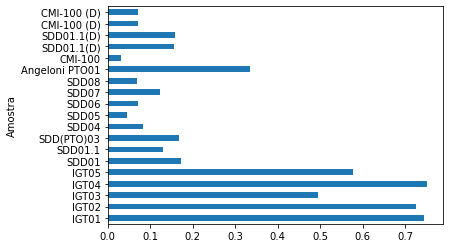

In [3]:
df1 = df1.loc[df1["Materia Organica"] > 0]

df1["Materia Organica"].plot.barh();

In [4]:
df2 = pd.read_excel(fname, index_col="Amostra", sheet_name=2)
df2

,Erlenmeyer,Peso Erlenmeyer (g),Peso amostra (g),Peso após estufa (g),Materia Orgânica
Amostra,,,,,
IGT01,1,52.960,0.508,53.222,0.484252
IGT02,2,60.930,0.502,61.187,0.488048
IGT03,3,50.185,0.500,50.499,0.372000
IGT04,4,64.767,0.503,65.076,0.385686
IGT05,5,52.893,0.504,53.196,0.398810
SDD01,6,57.762,0.547,58.338,-0.053016
SDD01.1,7,56.654,0.514,57.180,-0.023346
SDD(PTO)03,8,46.221,0.500,46.751,-0.060000
SDD(PTO)04,9,39.721,0.523,40.337,-0.177820


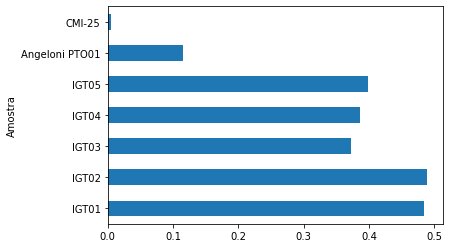

In [5]:
df2 = df2.loc[df2["Materia Orgânica"] > 0]
df2["Materia Orgânica"].plot.barh();

In [6]:
common = list(set(df1.index).intersection(df2.index))

metodo1 = df1.loc[common]["Materia Organica"]
metodo1.name = "mufla"

metodo2 = df2.loc[common]["Materia Orgânica"]
metodo2.name = "oxigenada"

In [7]:
df = pd.concat([metodo1, metodo2], axis=1)

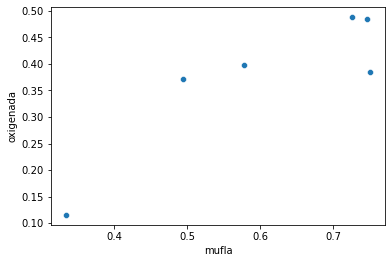

In [8]:
import seaborn


seaborn.scatterplot(data=df, x="mufla", y="oxigenada");